<a href="https://colab.research.google.com/github/SethuSA/CMP7005-Programming-for-data-analysis/blob/main/Simple_Linear_Regression_Workshop_8_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Objective of the Workshop**
The objective of this workshop is to provide students with hands-on experience in applying linear and multiple regression techniques to analyze environmental data. By working with real-world climate and ecosystem variables, students will gain insights into how regression models can be used to identify relationships between key environmental factors, make predictions, and support data-driven decision-making.

**Through this workshop, you will:**

* Understand the concepts of linear and multiple regression and their applications in environmental science.
* Explore feature selection and correlation analysis to determine key influencing factors.
* Implement regression models using Python (Pandas, Scikit-learn, and Matplotlib/Seaborn).
* Evaluate model performance using metrics such as R-squared and Mean Squared Error (MSE).
* Interpret regression outputs and derive meaningful conclusions from the results.

## Importing the required packages

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn.model_selection import train_test_split

### Task 1 Import Wetland data and create a Pandas DataFrame

In [5]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd "/content/drive/MyDrive/Colab"
# please change the path according to the location of your data

/content/drive/MyDrive/Colab


In [7]:
%ls

 FuelConsumption.csv            Sales_March_2019.csv
'Sales-Analysis-Dataset (3)'/   Sales_May_2019.csv
 Sales_April_2019.csv           Sales_November_2019.csv
 Sales_August_2019.csv          Sales_October_2019.csv
 Sales_December_2019.csv        Sales_September_2019.csv
 Sales_February_2019.csv        Stu_MarketPulse_Electronics.ipynb
 Sales_January_2019.csv         Week_2_workshop_demo.ipynb
 Sales_July_2019.csv            World_GDP.csv
 Sales_June_2019.csv            xx/


# **Reading the FuelConsumption data**

In [8]:
df=pd.read_csv('FuelConsumption.csv')

In [9]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data exploration

###  Task 2: Inspect the first few rows of the DataFrame and summarise the descriptive statistics of the data

In [10]:
# Summarise the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [11]:
cdf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
...,...,...,...,...
1062,3.0,6,11.8,271
1063,3.2,6,11.5,264
1064,3.0,6,11.8,271
1065,3.2,6,11.3,260


## Task 3: Plot to check whether the relationship between the independent and dependent variable is linear or not

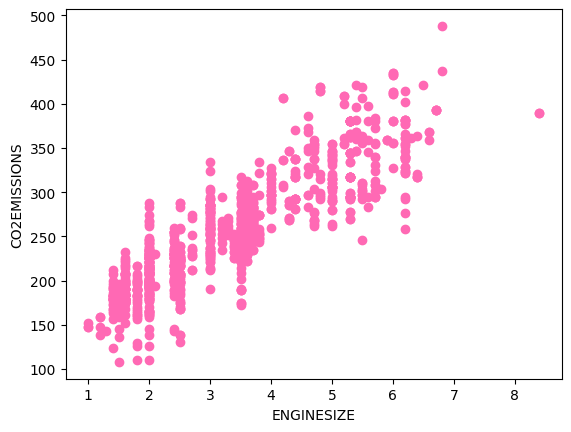

In [12]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS, color='hotpink')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

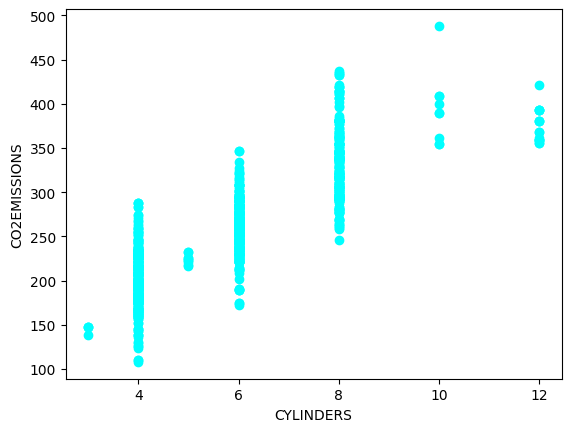

In [13]:
plt.scatter(df.CYLINDERS,df.CO2EMISSIONS, color='cyan')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

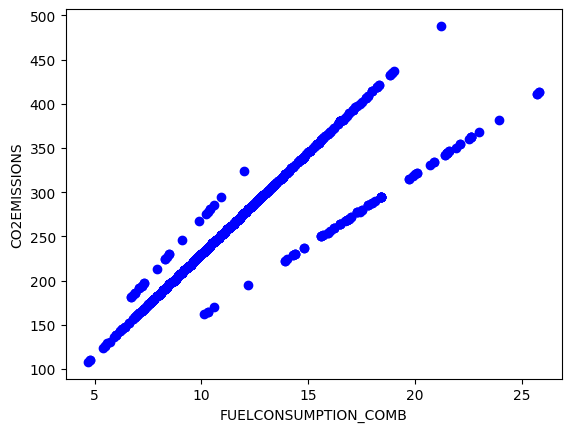

In [14]:
plt.scatter(df.FUELCONSUMPTION_COMB,df.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()


Which of the above variables do you think will work best to explain a linear relation with CO2 emission?

## Task 4: Train-test data preparation

In [15]:
X=df[['ENGINESIZE']]
X


,ENGINESIZE
0,2.0
1,2.4
2,1.5
3,3.5
4,3.5
...,...
1062,3.0
1063,3.2
1064,3.0
1065,3.2


In [16]:
y=df[['CO2EMISSIONS']]
y

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244
...,...
1062,271
1063,264
1064,271
1065,260


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
print(X_train)

      ENGINESIZE
1038         2.0
161          3.6
669          4.6
663          2.5
840          2.5
...          ...
1046         2.5
1016         2.0
780          1.6
93           2.0
137          3.0

[853 rows x 1 columns]


In [19]:
print(X_test)

      ENGINESIZE
200          1.8
864          4.0
798          1.6
1026         2.0
381          5.0
...          ...
382          5.0
858          1.8
588          6.4
1014         1.8
94           3.0

[214 rows x 1 columns]


In [20]:
print(y_train)

      CO2EMISSIONS
1038           207
161            260
669            283
663            239
840            260
...            ...
1046           225
1016           209
780            179
93             209
137            278

[853 rows x 1 columns]


In [21]:
print(X_test)

      ENGINESIZE
200          1.8
864          4.0
798          1.6
1026         2.0
381          5.0
...          ...
382          5.0
858          1.8
588          6.4
1014         1.8
94           3.0

[214 rows x 1 columns]


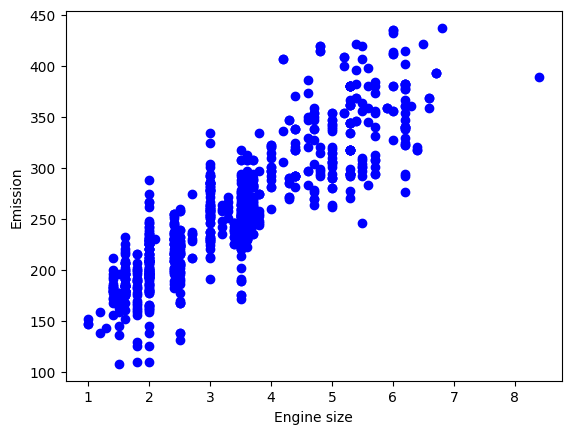

In [22]:
# Train data distribution
plt.scatter(X_train,y_train, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Task 5: Using sklearn package for data modelling

In [23]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(X_train,y_train)

# The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[39.9121239]]
Intercept: [122.80863636]


Text(0, 0.5, 'Emission')

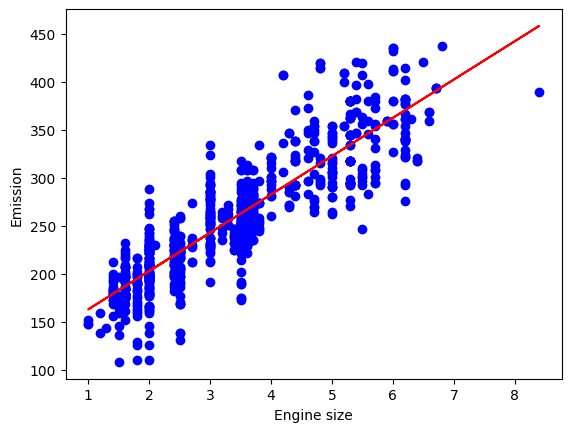

In [24]:
# Plot outputs
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,regr.coef_[0][0]*X_train + regr.intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Task 6: Model evaluation

In [25]:
from sklearn.metrics import r2_score
test_y_ = regr.predict(X_test)

In [26]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_-y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_-y_test)**2))
print("R2-score: %.2f" % r2_score(test_y_,y_test))

Mean absolute error: 24.36
Residual sum of squares (MSE): 975.36
R2-score: 0.72
